(334, 14)
(4676, 1)
(4676, 1)
(4676, 1)
(4676, 1)
(4676, 1)
(4676, 1)


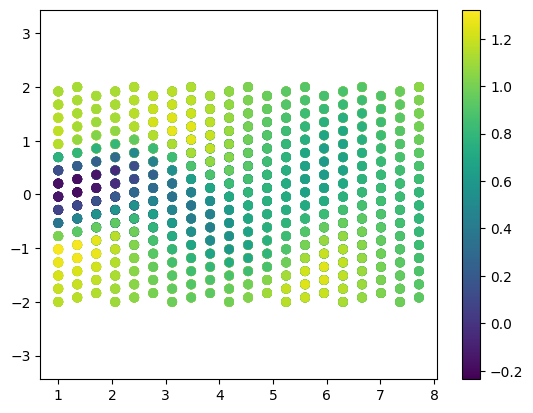

In [2]:
import numpy as np
import scipy.io
# Load Data
data = scipy.io.loadmat('../Data/cylinder_nektar_wake.mat')
        
U_star = data['U_star'] # N x 2 x T
P_star = data['p_star'] # N x T
t_star = data['t'] # T x 1
X_star = data['X_star'] # N x 2

N = X_star.shape[0]
T = t_star.shape[0]

# Rearrange Data 
XX = np.tile(X_star[:,0:1], (1,T)) # N x T
YY = np.tile(X_star[:,1:2], (1,T)) # N x T
TT = np.tile(t_star, (1,N)).T # N x T

UU = U_star[:,0,:] # N x T
VV = U_star[:,1,:] # N x T
PP = P_star # N x T

# Take every 4th of XX, YY, TT, UU, VV, PP
step = 15
XX = XX[::step,::step]
YY = YY[::step,::step]
TT = TT[::step,::step]
UU = UU[::step,::step]
VV = VV[::step,::step]
PP = PP[::step,::step]

print(XX.shape)

x = XX.flatten()[:,None] # NT x 1
y = YY.flatten()[:,None] # NT x 1
t = TT.flatten()[:,None] # NT x 1

u = UU.flatten()[:,None] # NT x 1
v = VV.flatten()[:,None] # NT x 1
p = PP.flatten()[:,None] # NT x 1

# Print the shape of the data
print(x.shape)
print(y.shape)
print(t.shape)
print(u.shape)
print(v.shape)
print(p.shape)

# Plot scatter of x y u
import matplotlib.pyplot as plt
plt.scatter(x, y, c=u)
plt.colorbar()
plt.axis('equal')
plt.show()

In [3]:
# Create a GraphConv from pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch_geometric
from scipy.spatial import Delaunay
from torch_geometric.nn import GraphConv

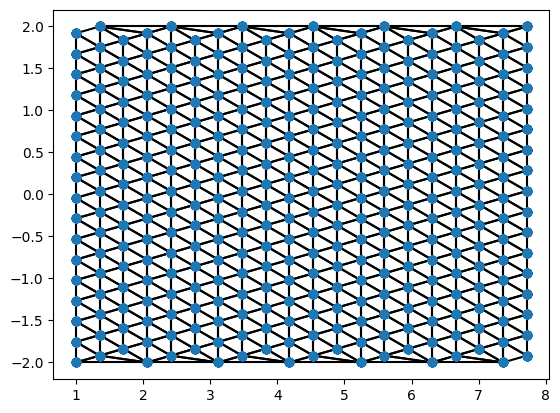

In [4]:
# Connect the points with Delaunay triangulation
points = np.hstack((x, y))
tri = Delaunay(points)
edges = []
edge = np.vstack((tri.simplices[:,[0,1]],tri.simplices[:,[1,2]],tri.simplices[:,[2,0]])).T

# Plot the triangulation
plt.figure()
for i in range(edge.shape[1]):
    plt.plot(x[edge[:,i]], y[edge[:,i]], 'k-')
plt.plot(x, y, 'o')
plt.show()


In [11]:
import tensorflow as tf
mu = tf.constant([[0.0, 0.0], [1.0, -1.0]])  # Example means for two data points
print(mu.shape)
print(mu)
e = tf.random.normal(shape=tf.shape(mu))
print(e.shape)
print(e)

(2, 2)
tf.Tensor(
[[ 0.  0.]
 [ 1. -1.]], shape=(2, 2), dtype=float32)
(2, 2)
tf.Tensor(
[[0.40774783 1.9716821 ]
 [1.6039491  0.8341425 ]], shape=(2, 2), dtype=float32)
